## Import Library

---



In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime as time
start = time.now()

## Dataset Cervical Cancer

In [2]:
!git clone https://github.com/dunasi4139/Cervical-Cancer-EfficientNetV2.git

Cloning into 'Cervical-Cancer-EfficientNetV2'...
remote: Enumerating objects: 5011, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 5011 (delta 0), reused 3 (delta 0), pack-reused 5008
Receiving objects: 100% (5011/5011), 223.47 MiB | 40.95 MiB/s, done.
Updating files: 100% (5001/5001), done.


In [3]:
base_dir = '/content/Cervical-Cancer-EfficientNetV2/dataset'
data_dir = os.path.join(base_dir)

In [4]:
os.listdir(data_dir)

['cervix_koc', 'cervix_dyk', 'cervix_mep', 'cervix_pab', 'cervix_sfi']

## Preprocessing Data

In [5]:
label = ['cervix_sfi', 'cervix_dyk', 'cervix_pab', 'cervix_koc', 'cervix_mep']
data_prep = []

# Merubah Pixcel ke array sejumlah banyaknya data dengan resize gambar 224x224
for l in label :
  path = os.path.join(data_dir, l)
  class_num = label.index(l)
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path, img))
      new_array = cv2.resize(img_array,(224,224))
      data_prep.append([new_array,class_num])
    except Exception as e:
      pass

In [6]:
# Memasukkan Data Train ke fitur(X) dan label(y)
X=[]
y=[]
for fitur, label in data_prep :
    X.append(fitur)
    y.append(label)

In [7]:
# Merubah X dan y dari list ke array
X = np.array(X)
y = np.array(y)

In [8]:
# Cetak shape X dan y
print("Shape Data X : ", X.shape)
print("Shape Data X : ", y.shape)

Shape Data X :  (5000, 224, 224, 3)
Shape Data X :  (5000,)


In [9]:
X[2022]

array([[[173, 155, 138],
        [174, 156, 139],
        [176, 158, 141],
        ...,
        [169, 174, 168],
        [168, 173, 171],
        [167, 174, 171]],

       [[179, 162, 142],
        [177, 160, 139],
        [176, 159, 140],
        ...,
        [169, 174, 167],
        [168, 173, 172],
        [167, 174, 171]],

       [[175, 162, 137],
        [176, 163, 139],
        [176, 163, 139],
        ...,
        [169, 174, 168],
        [168, 173, 172],
        [167, 174, 171]],

       ...,

       [[232, 201, 133],
        [234, 205, 130],
        [233, 199, 133],
        ...,
        [187, 175, 151],
        [187, 175, 151],
        [187, 175, 151]],

       [[233, 201, 133],
        [235, 204, 129],
        [233, 199, 133],
        ...,
        [187, 178, 154],
        [187, 177, 153],
        [186, 177, 153]],

       [[235, 201, 133],
        [235, 204, 129],
        [233, 199, 133],
        ...,
        [181, 176, 151],
        [182, 177, 153],
        [183, 179, 154]]

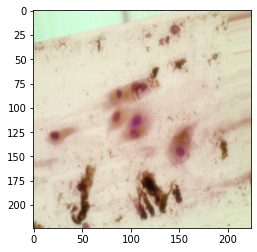

Label :  2


In [ ]:
# Cetak 1 Sample X dan y
plt.imshow(np.squeeze(X[2022]))
plt.show()
print("Label : ", y[2022])

In [ ]:
# Membuat Fungsi One Hot Encoding untuk neouron Output dan One Hot Decoding untuk mengembalikan nilai semula untuk Testing
def onehot_enc(y):
  y = pd.get_dummies(y)
  return y

def onehot_dec(enc, mi=0):
  enc = enc.to_numpy()
  return [np.argmax(e) + mi for e in enc]


In [ ]:
# Cetak Nilai y setelah di one Hot Encoding
y =  onehot_enc(y)
print(y.shape)
print(y.sample(5))

(5000, 5)
      0  1  2  3  4
4148  0  0  0  0  1
2824  0  0  1  0  0
1781  0  1  0  0  0
146   1  0  0  0  0
4153  0  0  0  0  1


In [ ]:
# Membagi Data Menjadi Data Training, validation, dan Testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1001) 

X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.9 = 0.225

In [ ]:
print("X_train : ", X_train.shape)
print("y_train : ", y_train.shape)
print("X_train : ", X_val.shape)
print("y_train : ", y_val.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train :  (3375, 224, 224, 3)
y_train :  (3375, 5)
X_train :  (1125, 224, 224, 3)
y_train :  (1125, 5)
X_test :  (500, 224, 224, 3)
y_test :  (500, 5)


## Perancangan Arsitektur EfficientNetV2

In [ ]:
import keras
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.applications.efficientnet_v2 import EfficientNetV2M

In [ ]:
base_model = EfficientNetV2M(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)
base_model.summary()

214201816/214201816 [==============================] - 1s 0us/step
Model: "efficientnetv2-m"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                

In [ ]:
from keras.layers import BatchNormalization
from keras import Model

In [ ]:
# Menambah Layer Baru untuk modelnya
inp = base_model.input
m =  base_model.output
m = Flatten()(m)
m = Dense(200, activation = "relu", name='fc1')(m)
m = BatchNormalization()(m)
m = Dropout(0.3)(m)
m = Dense(100, activation = "relu", name='fc2')(m)
m = Dropout(0.3)(m)
m = Dense(50, activation = "relu", name='fc3')(m)
predictions = Dense(5, activation = "softmax", name='pred')(m)

In [ ]:
model_new = Model(inputs=base_model.input, outputs=predictions)
model_new.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# Memfreeze layer supaya training tidak lama
for layer in model_new.layers:
  if layer.name == 'block7e_dwconv2':
    break
  layer.trainable = False
  print('Layer ' + layer.name + ' frozen.')
model_new.summary()

Layer input_1 frozen.
Layer rescaling frozen.
Layer stem_conv frozen.
Layer stem_bn frozen.
Layer stem_activation frozen.
Layer block1a_project_conv frozen.
Layer block1a_project_bn frozen.
Layer block1a_project_activation frozen.
Layer block1a_add frozen.
Layer block1b_project_conv frozen.
Layer block1b_project_bn frozen.
Layer block1b_project_activation frozen.
Layer block1b_drop frozen.
Layer block1b_add frozen.
Layer block1c_project_conv frozen.
Layer block1c_project_bn frozen.
Layer block1c_project_activation frozen.
Layer block1c_drop frozen.
Layer block1c_add frozen.
Layer block2a_expand_conv frozen.
Layer block2a_expand_bn frozen.
Layer block2a_expand_activation frozen.
Layer block2a_project_conv frozen.
Layer block2a_project_bn frozen.
Layer block2b_expand_conv frozen.
Layer block2b_expand_bn frozen.
Layer block2b_expand_activation frozen.
Layer block2b_project_conv frozen.
Layer block2b_project_bn frozen.
Layer block2b_drop frozen.
Layer block2b_add frozen.
Layer block2c_expa

## Training Data

In [ ]:
# Mentrain data 
model_new.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history = model_new.fit(
    X_train,
    y_train,
    epochs= 10, 
    validation_data=(X_val,y_val),
    batch_size=50,
    verbose = 1,
    shuffle = 1
)

Epoch 1/10
68/68 [==============================] - 72s 509ms/step - loss: 0.9213 - accuracy: 0.6504 - val_loss: 0.3174 - val_accuracy: 0.8827
Epoch 2/10
68/68 [==============================] - 29s 422ms/step - loss: 0.2760 - accuracy: 0.9123 - val_loss: 0.2270 - val_accuracy: 0.9369
Epoch 3/10
68/68 [==============================] - 29s 432ms/step - loss: 0.1447 - accuracy: 0.9520 - val_loss: 0.1323 - val_accuracy: 0.9582
Epoch 4/10
68/68 [==============================] - 30s 442ms/step - loss: 0.1048 - accuracy: 0.9695 - val_loss: 0.1393 - val_accuracy: 0.9556
Epoch 5/10
68/68 [==============================] - 30s 439ms/step - loss: 0.0867 - accuracy: 0.9719 - val_loss: 0.1472 - val_accuracy: 0.9520
Epoch 6/10
68/68 [==============================] - 30s 437ms/step - loss: 0.0642 - accuracy: 0.9801 - val_loss: 0.2087 - val_accuracy: 0.9396
Epoch 7/10
68/68 [==============================] - 30s 440ms/step - loss: 0.0631 - accuracy: 0.9790 - val_loss: 0.1377 - val_accuracy: 0.9600

## Prediksi Data

In [ ]:
y_pred = np.argmax(model_new.predict(X_test), axis=-1)

16/16 [==============================] - 9s 260ms/step


In [ ]:
y_pred

array([2, 4, 0, 3, 3, 3, 4, 4, 0, 4, 2, 1, 2, 4, 3, 1, 4, 0, 2, 4, 1, 0,
       4, 3, 3, 2, 4, 0, 1, 3, 3, 4, 4, 4, 3, 1, 4, 1, 3, 0, 0, 4, 4, 2,
       2, 0, 1, 0, 4, 2, 0, 0, 0, 1, 1, 3, 4, 2, 0, 2, 4, 4, 2, 4, 1, 3,
       3, 2, 3, 0, 2, 1, 4, 0, 2, 0, 2, 3, 1, 2, 0, 3, 3, 4, 3, 2, 3, 0,
       2, 0, 3, 0, 1, 4, 3, 3, 0, 1, 3, 1, 4, 0, 1, 1, 1, 0, 0, 1, 4, 4,
       2, 2, 4, 1, 4, 1, 2, 1, 1, 1, 3, 1, 1, 0, 4, 4, 1, 2, 1, 4, 3, 4,
       3, 4, 4, 2, 3, 3, 2, 2, 3, 4, 3, 4, 4, 0, 1, 3, 4, 4, 4, 1, 1, 0,
       4, 4, 0, 3, 1, 4, 0, 1, 3, 1, 3, 0, 0, 4, 4, 3, 0, 3, 4, 3, 0, 4,
       4, 4, 3, 3, 0, 0, 1, 2, 0, 1, 3, 2, 3, 3, 1, 1, 3, 1, 2, 1, 4, 0,
       0, 3, 0, 2, 4, 1, 3, 3, 0, 1, 3, 1, 0, 4, 0, 3, 2, 1, 0, 2, 0, 0,
       0, 1, 0, 2, 1, 4, 0, 2, 0, 0, 1, 1, 3, 1, 2, 1, 3, 2, 2, 1, 0, 3,
       3, 1, 1, 1, 1, 3, 0, 2, 0, 1, 3, 2, 4, 3, 0, 3, 1, 1, 1, 2, 0, 1,
       2, 0, 2, 4, 2, 2, 3, 4, 2, 3, 4, 1, 0, 0, 1, 0, 1, 4, 0, 1, 0, 4,
       2, 1, 0, 2, 4, 0, 4, 1, 3, 1, 4, 4, 3, 0, 3,

## Hasil Prediksi

In [ ]:
y_pred[1]

4

In [ ]:
y_test

,0,1,2,3,4
2295,0,0,1,0,0
4733,0,0,0,0,1
759,1,0,0,0,0
3072,0,0,0,1,0
3562,0,0,0,1,0
...,...,...,...,...,...
4047,0,0,0,0,1
2800,0,0,1,0,0
2011,0,0,1,0,0
2605,0,0,1,0,0


In [ ]:
y_test_dec = onehot_dec(y_test,mi=0)

In [ ]:
y_test_dec

[2,
 4,
 0,
 3,
 3,
 3,
 4,
 4,
 0,
 1,
 2,
 1,
 2,
 4,
 3,
 1,
 4,
 0,
 2,
 4,
 1,
 0,
 4,
 3,
 4,
 2,
 4,
 0,
 1,
 3,
 3,
 4,
 4,
 4,
 3,
 1,
 4,
 1,
 3,
 0,
 0,
 4,
 4,
 2,
 2,
 0,
 1,
 3,
 4,
 2,
 0,
 0,
 0,
 1,
 1,
 3,
 4,
 2,
 0,
 2,
 4,
 4,
 2,
 4,
 1,
 3,
 3,
 2,
 3,
 0,
 2,
 3,
 4,
 0,
 2,
 0,
 2,
 3,
 1,
 2,
 0,
 3,
 3,
 4,
 3,
 2,
 3,
 0,
 2,
 0,
 3,
 0,
 1,
 4,
 3,
 3,
 0,
 1,
 3,
 1,
 4,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 4,
 4,
 2,
 2,
 4,
 1,
 4,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 1,
 0,
 4,
 4,
 1,
 2,
 1,
 4,
 3,
 4,
 3,
 4,
 4,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 4,
 4,
 0,
 1,
 3,
 4,
 4,
 4,
 1,
 1,
 0,
 4,
 4,
 0,
 3,
 1,
 4,
 0,
 1,
 3,
 1,
 3,
 0,
 3,
 4,
 4,
 3,
 0,
 3,
 4,
 3,
 0,
 4,
 4,
 4,
 3,
 3,
 0,
 0,
 3,
 2,
 0,
 1,
 3,
 2,
 3,
 3,
 3,
 1,
 3,
 1,
 2,
 1,
 4,
 0,
 0,
 3,
 0,
 2,
 4,
 1,
 3,
 3,
 0,
 1,
 3,
 1,
 0,
 4,
 0,
 3,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 4,
 0,
 2,
 0,
 0,
 2,
 1,
 3,
 1,
 2,
 1,
 3,
 2,
 2,
 1,
 0,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 0,
 2,


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

print('Confusion Matrix')
print(confusion_matrix(y_test_dec, y_pred))

print('Confusion Matrix Multi Label')
print(multilabel_confusion_matrix(y_test_dec, y_pred))

print('Classification Report')
print(classification_report(y_test_dec, y_pred))

Confusion Matrix
[[ 99   0   0   0   1]
 [  0  99   0   1   2]
 [  0   1  89   0   1]
 [  3   3   1  98   0]
 [  0   0   0   1 101]]
Confusion Matrix Multi Label
[[[397   3]
  [  1  99]]

 [[394   4]
  [  3  99]]

 [[408   1]
  [  2  89]]

 [[393   2]
  [  7  98]]

 [[394   4]
  [  1 101]]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       100
           1       0.96      0.97      0.97       102
           2       0.99      0.98      0.98        91
           3       0.98      0.93      0.96       105
           4       0.96      0.99      0.98       102

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [ ]:
t = time.now() - start
print('Waktu Eksekusi:',str(t.seconds)+","+str(t.microseconds)[:3],'detik')

Waktu Eksekusi: 423,313 detik
